In [ ]:
# Imports packages 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import linear_model
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
# install synthetic control package 
!pip install SyntheticControlMethods


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#  synthetic control package requires scipy 1.4.1 
import scipy
print(scipy.__version__)

!pip install scipy==1.4.1


1.4.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# connect google colab to drive files to connect to csv files 
from google.colab import files
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
#import Synth and create dataframes for both the 5 and 10 feature datasets 
import pandas as pd
import numpy as np
import scipy
#from SyntheticControlMethods import Synth, DiffSynth

data_5 = pd.read_csv('/drive/My Drive/Cell_Phone_DF5.csv')
data_10 = pd.read_csv('/drive/My Drive/Cell_Phone_DF10.csv')


In [ ]:
data_5.head()

,Unnamed: 0,districtcode,schoolyear,districtname,8th_math_percentmet,attendance,teacher_min_effective_percentage,Estimate Median household income in the past 12 months (in 2018 inflation-adjusted dollars),fundbalanceas%ofexpenditure,"Estimate Total Living in household with Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months"
0,0,11010,2015-2016,Benton Harbor Area Schools,5.0,82.44,40.54,31164,-45.53,4886
1,1,11010,2016-2017,Benton Harbor Area Schools,2.5,88.95,9.52,31164,-21.41,4886
2,2,11010,2017-2018,Benton Harbor Area Schools,2.5,82.87,5.49,31164,-17.31,4886
3,3,11010,2018-2019,Benton Harbor Area Schools,2.5,84.71,9.64,31164,-15.36,4886
4,4,11010,2020-2021,Benton Harbor Area Schools,2.5,77.02,3.19,31164,14.80,4886


In [ ]:
data_10.head()

,Unnamed: 0,districtcode,schoolyear,districtname,8th_math_percentmet,english_language_learners_enrollment,attendance,english_language_learners_enrollment.1,admin_min_effective_percentage,teacher_min_effective_percentage,Estimate Median household income in the past 12 months (in 2018 inflation-adjusted dollars),Estimate Total Bachelor's degree,Estimate Total Master's degree,fundbalanceas%ofexpenditure,"Estimate Total Living in household with Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months"
0,0,11010,2015-2016,Benton Harbor Area Schools,5.0,82,82.44,82,0.00,40.54,31164,1502,824,-45.53,4886
1,1,11010,2016-2017,Benton Harbor Area Schools,2.5,57,88.95,57,9.09,9.52,31164,1502,824,-21.41,4886
2,2,11010,2017-2018,Benton Harbor Area Schools,2.5,68,82.87,68,45.45,5.49,31164,1502,824,-17.31,4886
3,3,11010,2018-2019,Benton Harbor Area Schools,2.5,57,84.71,57,0.00,9.64,31164,1502,824,-15.36,4886
4,4,11010,2020-2021,Benton Harbor Area Schools,2.5,14,77.02,14,7.14,3.19,31164,1502,824,14.80,4886


In [ ]:
#split out year and turn into int as column is currently a string e.g. 2015-2016
data_5['first_year'] = data_5.schoolyear.apply(lambda x: x[:4])
data_5["first_year"] = data_5["first_year"].astype(str).astype(int)

data_10['first_year'] = data_10.schoolyear.apply(lambda x: x[:4])
data_10["first_year"] = data_10["first_year"].astype(str).astype(int)


#rename columns to make them easier to understand 
data_5.rename(columns = {'first_year':'year', 'Estimate Total Living in household with Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months':'gov_aid', 'fundbalanceas%ofexpenditure':'balance_of_expenditure', 'Estimate Median household income in the past 12 months (in 2018 inflation-adjusted dollars)':'median_income'}, inplace = True)
data_10.rename(columns = {'first_year':'year', 'Estimate Total Living in household with Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months':'gov_aid', 'fundbalanceas%ofexpenditure':'balance_of_expenditure', 'Estimate Median household income in the past 12 months (in 2018 inflation-adjusted dollars)':'median_income',"Estimate Total Bachelor's degree": "Bachelor degree", "Estimate Total Master's degree" : "Master degree" }, inplace = True)

In [ ]:
data_5.head()

,Unnamed: 0,districtcode,schoolyear,districtname,8th_math_percentmet,attendance,teacher_min_effective_percentage,median_income,balance_of_expenditure,gov_aid,year
0,0,11010,2015-2016,Benton Harbor Area Schools,5.0,82.44,40.54,31164,-45.53,4886,2015
1,1,11010,2016-2017,Benton Harbor Area Schools,2.5,88.95,9.52,31164,-21.41,4886,2016
2,2,11010,2017-2018,Benton Harbor Area Schools,2.5,82.87,5.49,31164,-17.31,4886,2017
3,3,11010,2018-2019,Benton Harbor Area Schools,2.5,84.71,9.64,31164,-15.36,4886,2018
4,4,11010,2020-2021,Benton Harbor Area Schools,2.5,77.02,3.19,31164,14.80,4886,2020


In [ ]:
data_10.head()

,Unnamed: 0,districtcode,schoolyear,districtname,8th_math_percentmet,english_language_learners_enrollment,attendance,english_language_learners_enrollment.1,admin_min_effective_percentage,teacher_min_effective_percentage,median_income,Bachelor degree,Master degree,balance_of_expenditure,gov_aid,year
0,0,11010,2015-2016,Benton Harbor Area Schools,5.0,82,82.44,82,0.00,40.54,31164,1502,824,-45.53,4886,2015
1,1,11010,2016-2017,Benton Harbor Area Schools,2.5,57,88.95,57,9.09,9.52,31164,1502,824,-21.41,4886,2016
2,2,11010,2017-2018,Benton Harbor Area Schools,2.5,68,82.87,68,45.45,5.49,31164,1502,824,-17.31,4886,2017
3,3,11010,2018-2019,Benton Harbor Area Schools,2.5,57,84.71,57,0.00,9.64,31164,1502,824,-15.36,4886,2018
4,4,11010,2020-2021,Benton Harbor Area Schools,2.5,14,77.02,14,7.14,3.19,31164,1502,824,14.80,4886,2020


In [ ]:
#drop columns that will not be used in the model 
data_5.drop(['Unnamed: 0', 'schoolyear','districtcode'] ,axis=1, inplace=True)
data_10.drop(['Unnamed: 0', 'schoolyear','districtcode','english_language_learners_enrollment.1'] ,axis=1, inplace=True)

In [ ]:
data_5.head()
data_10.head()

,districtname,8th_math_percentmet,english_language_learners_enrollment,attendance,admin_min_effective_percentage,teacher_min_effective_percentage,median_income,Bachelor degree,Master degree,balance_of_expenditure,gov_aid,year
0,Benton Harbor Area Schools,5.0,82,82.44,0.00,40.54,31164,1502,824,-45.53,4886,2015
1,Benton Harbor Area Schools,2.5,57,88.95,9.09,9.52,31164,1502,824,-21.41,4886,2016
2,Benton Harbor Area Schools,2.5,68,82.87,45.45,5.49,31164,1502,824,-17.31,4886,2017
3,Benton Harbor Area Schools,2.5,57,84.71,0.00,9.64,31164,1502,824,-15.36,4886,2018
4,Benton Harbor Area Schools,2.5,14,77.02,7.14,3.19,31164,1502,824,14.80,4886,2020


In [ ]:
#check years 
data_5['year'].unique()

array([2015, 2016, 2017, 2018, 2020])

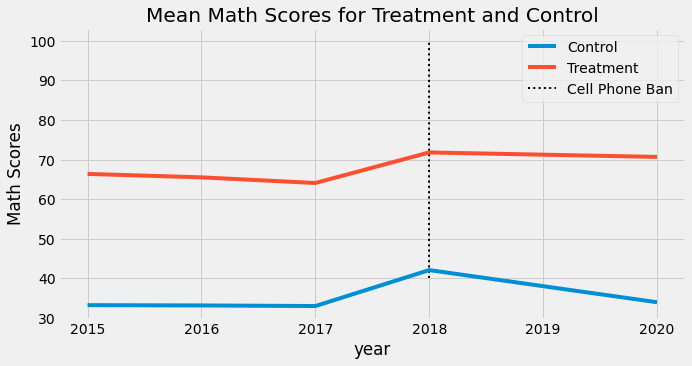

In [ ]:
# visualize treatment and control shools average math schools over the years 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#print(data_5.replace(False,'Control'))
data_5 = data_5.replace(False,'Control')
data_5 = data_5.replace(True,'Treatment')

ax = plt.subplot(1, 1, 1)
data_5['Forest_Hill'] = data_5['districtname'] =='Forest Hills Public Schools'
(data_5.assign(forest = np.where(data_5["Forest_Hill"], "Forest Hill Public", "Other District"))
 .groupby(["year", "Forest_Hill"])
 ["8th_math_percentmet"]
 .mean()
 .reset_index()
 .pivot("year", "Forest_Hill", "8th_math_percentmet")
 .plot(ax=ax, label='Roll', figsize=(10,5)))

plt.vlines(x=2018, ymin=40, ymax=100, linestyle=":", lw=2, label="Cell Phone Ban")
plt.xlabel("year")
plt.ylabel("Math Scores")
plt.title("Mean Math Scores for Treatment and Control")
plt.legend();  

legend_labels = [ 'Control', 'Treatment', 'Cell Phone Ban']
plt.legend(labels = legend_labels, loc = 'upper right')
plt.show()
#axBS.plot(data_BS_R, label='Roll')
#axBS.plot(data_BS_Y, label='Yaw')

In [ ]:
#Build synthetic control models based off of the two DFs. Variables in model inlcude Dependent 8th_math_percentmet, Identifiers to split between control and treatment 1) districtname and 2) year  
sc_5 = Synth(data_5, "8th_math_percentmet", "districtname", "year", 2019, 'Forest Hills Public Schools', n_optim=10, pen="auto", random_seed=0)

sc_10 = Synth(data_10, "8th_math_percentmet", "districtname", "year", 2019, 'Forest Hills Public Schools', n_optim=10, pen="auto", random_seed=0)

NameError: ignored

In [ ]:
#Import matplotlib and set style of graphs 
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

#plot synthetic control for 5 feature model 
sc_5.plot(["original", "pointwise", "cumulative"], treated_label="Forest Hills Public Schools", 
            synth_label="Synthetic Control", treatment_label="Cellphone Ban")




In [ ]:
#plot synthetic control for 10 feature model 

sc_10.plot(["original", "pointwise", "cumulative"], treated_label="Forest Hills Public Schools", 
            synth_label="Synthetic Control", treatment_label="Cellphone Ban")

In [ ]:
# Districts identified for 5-feature model synthetic control 
sc_5.original_data.weight_df

In [ ]:
sc_5.original_data

In [ ]:
# Districts identified for 10-feature model synthetic control 

sc_10.original_data.weight_df

In [ ]:
sc_5.original_data.rmspe_df

In [ ]:
sc_10.original_data.rmspe_df

In [ ]:
# Breakdown of 5-feature model similarities between control and treatment group 
sc_5.original_data.comparison_df

In [ ]:
# Breakdown of 10-feature model similarities between control and treatment group 
sc_10.original_data.comparison_df

In [ ]:
#In-time placebo set at 2017 (1 year prior to actual treatment). Placebo helps verify actual synthetic control is not a fluke 
sc_5.in_time_placebo(2017, n_optim=50)

#Visualize
sc_5.plot(['in-time placebo'], 
            treated_label="Forest Hills Public Schools",
            synth_label="Synthetic Control")

In [ ]:
#In-time placebo set at 2017 (1 year prior to actual treatment). Placebo helps verify actual synthetic control is not a fluke 

sc_10.in_time_placebo(2017, n_optim=50)

#Visualize
sc_10.plot(['in-time placebo'], 
            treated_label="Forest Hills Public Schools",
            synth_label="Synthetic Control")

In [ ]:

data_5.head()
#print(data.replace(49.50, 60))


In [ ]:
# visualize treatment and control shools average math schools over the years 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#print(data_5.replace(False,'Control'))
data_5 = data_5.replace(False,'Control')
data_5 = data_5.replace(True,'Treatment')

ax = plt.subplot(1, 1, 1)
data_5['Forest_Hill'] = data_5['districtname'] =='Forest Hills Public Schools'
(data_5.assign(forest = np.where(data_5["Forest_Hill"], "Forest Hill Public", "Other District"))
 .groupby(["year", "Forest_Hill"])
 ["8th_math_percentmet"]
 .mean()
 .reset_index()
 .pivot("year", "Forest_Hill", "8th_math_percentmet")
 .plot(ax=ax, label='Roll', figsize=(10,5)))

plt.vlines(x=2018, ymin=40, ymax=100, linestyle=":", lw=2, label="Cell Phone Ban")
plt.xlabel("year")
plt.ylabel("Math Scores")
plt.title("Mean Math Scores for Treatment and Control")
plt.legend();  